In [2]:
import pandas as pd
import ast 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data_jobs.csv")
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_IN = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

In [4]:
df_DA_IN['job_posted_month_no'] = df_DA_IN['job_posted_date'].dt.month

In [5]:
df_DA_IN_explode = df_DA_IN.explode('job_skills')

In [6]:
df_DA_IN_pivot = df_DA_IN_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [7]:
df_DA_IN_pivot.loc['Total'] = df_DA_IN_pivot.sum()
df_DA_IN_pivot = df_DA_IN_pivot[df_DA_IN_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_IN_pivot = df_DA_IN_pivot.drop('Total')



In [8]:
DA_totals = df_DA_IN.groupby('job_posted_month_no').size()

In [9]:
df_DA_IN_percent = df_DA_IN_pivot.div(DA_totals/100, axis=0)
df_DA_IN_percent

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,sqlite,suse,swift,tidyr,unify,vb.net,watson,webex,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,52.083333,38.194444,35.416667,28.472222,18.055556,25.000000,15.972222,4.166667,3.472222,7.638889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.694444,0.000000
2,54.237288,33.898305,38.983051,27.118644,20.338983,11.864407,19.491525,5.084746,5.932203,6.779661,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.847458,0.000000,0.000000
3,58.762887,25.773196,32.989691,30.927835,19.587629,10.309278,9.278351,7.216495,6.185567,3.092784,...,0.000000,0.000000,1.030928,1.030928,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,56.565657,35.353535,35.353535,27.272727,23.232323,24.242424,16.161616,4.040404,8.080808,7.070707,...,1.010101,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,68.750000,39.062500,57.812500,37.500000,28.125000,15.625000,14.062500,6.250000,14.062500,4.687500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,53.763441,45.161290,36.559140,31.182796,24.731183,30.107527,24.731183,10.752688,9.677419,5.376344,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,61.956522,40.217391,40.217391,41.304348,21.739130,21.739130,25.000000,5.434783,8.695652,5.434783,...,0.000000,0.000000,0.000000,0.000000,1.086957,0.00000,0.000000,0.000000,0.000000,0.000000
8,62.411348,41.134752,38.297872,33.333333,30.496454,17.021277,19.858156,14.184397,7.801418,4.964539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,57.831325,39.156627,35.542169,31.927711,25.903614,15.662651,16.265060,7.228916,3.012048,8.433735,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.60241,0.000000,0.000000,0.000000,0.000000


In [10]:
df_DA_IN_percent = df_DA_IN_percent.reset_index()
df_DA_IN_percent['job_posted_month'] = df_DA_IN_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
df_DA_IN_percent = df_DA_IN_percent.set_index('job_posted_month')
df_DA_IN_percent = df_DA_IN_percent.drop(columns='job_posted_month_no')


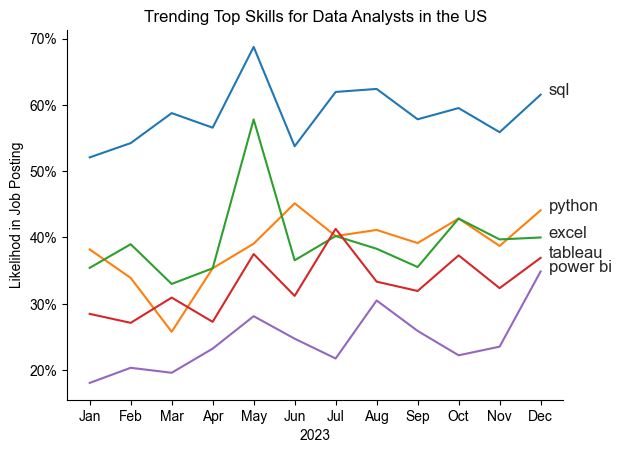

In [ ]:
df_plot = df_DA_IN_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
plt.title('Trending Top Skills for Data Analysts in the India')
plt.ylabel('Likelihod in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
sns.despine()

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())


for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])